# Fit AdapIF to HH Spike Trains

In [1]:
from brian2 import *
from brian2modelfitting import *

import numpy as np

INFO       Cache size for target "cython": 1109 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/alteska/.cython/brian_extensions" directory. [brian2]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 [py.warnings]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyte

In [2]:
dt = 0.01*ms
defaultclock.dt = dt

## Load the Data

In [3]:
voltage1 = genfromtxt('voltage1nA.csv', delimiter=',')
voltage2 = genfromtxt('voltage2nA.csv', delimiter=',')

In [4]:
inp_cur1 = genfromtxt('inp_cur1nA.csv', delimiter=',')
inp_cur2 = genfromtxt('inp_cur2nA.csv', delimiter=',')
inp_current = [inp_cur1, inp_cur2]
inp_current

[array([0.        , 0.05553714, 0.18616409, ..., 0.34263957, 0.23894004,
        0.24489567]),
 array([ 0.        , -0.08325095,  0.03536872, ...,  0.76675788,
         0.90452414,  1.0627096 ])]

In [5]:
out_spikes1 = genfromtxt('out_spikes1nA.csv', delimiter=',')
out_spikes2 = genfromtxt('out_spikes2nA.csv', delimiter=',')
out_spikes = [out_spikes1, out_spikes2]
out_spikes

[array([  71.23,  122.83,  210.92,  225.54,  239.2 ,  281.24,  303.7 ,
         336.2 ,  399.15,  536.37,  597.07,  663.54,  811.95,  939.29,
         962.57,  991.39, 1009.98, 1035.9 , 1078.18, 1113.35, 1155.7 ,
        1200.08, 1270.3 , 1293.  , 1315.59, 1467.74, 1488.74, 1522.48,
        1554.55, 1571.92, 1670.46, 1705.1 , 1730.37, 1746.35, 1793.  ,
        1866.76, 1892.38, 1937.42, 1948.02, 1986.21, 2111.73, 2171.24,
        2276.79, 2418.89, 2440.3 , 2546.8 , 2584.71, 2599.82, 2662.19,
        2837.62, 2961.99, 3005.25, 3059.41, 3177.22, 3190.72, 3252.33,
        3349.37, 3418.14, 3466.01, 3521.96, 3604.86, 3638.6 , 3660.36,
        3680.88, 3691.25, 3720.41, 3829.22, 3867.82, 3904.32, 3951.12,
        3961.46, 4031.54, 4085.24, 4118.16, 4163.5 , 4199.79, 4264.13,
        4357.91, 4377.63, 4440.7 , 4477.18, 4573.26, 4614.94, 4676.63,
        4696.7 , 4713.32, 4843.36]),
 array([4.81000e+00, 2.39700e+01, 6.56500e+01, 7.03400e+01, 1.01920e+02,
        1.10710e+02, 1.17300e+02, 2.47

## Model Fitting

In [6]:
# tau = 12.44*ms
# taut = 97.64*ms
# a = 0.21
# alpha = 7.2*mV
# R = 76*Mohm

model = '''
        dv/dt = (R*I- v)/tau :volt
        dvt/dt = (a*v - vt) / taut :volt
        alpha : volt (constant)
        a : 1 (constant)
        R : ohm (constant)
        tau : second (constant)
        taut : second (constant)
        '''
reset = '''
v = 0*mV
vt = vt + alpha
'''

In [7]:
n_opt = NevergradOptimizer()
metric = GammaFactor(time=5*second, delta=4*ms)

In [8]:
fitter = SpikeFitter(model=model, input_var='I', dt=dt,
                     input=inp_current * nA, output=out_spikes,
                     n_samples=30,
                     threshold='v > vt',
                     reset=reset,
                     refractory=1.4*ms,
                     param_init={'v': -65*mV},
                     )

In [9]:
result_dict, error = fitter.fit(n_rounds=10,
                                optimizer=n_opt,
                                metric=metric,
                                callback='text',
                                alpha=[5,10]*mV,
                                a = [0.1, 1],
                                R = [1, 100]*Mohm, 
                                tau = [10, 13]*ms,
                                taut = [90, 100]*ms,
                               )

Round 0: fit (0.007927566256052487, 0.09138638223537193, 50501120.710706815, 0.010903669984379126, 0.813598866978017) with error: 0.11952921934217325
Round 1: fit (0.007927566256052487, 0.09138638223537193, 50501120.710706815, 0.010903669984379126, 0.813598866978017) with error: 0.11952921934217325
Round 2: fit (0.007553569135013626, 0.09232189573205218, 47934122.77332092, 0.010982190688583906, 0.8831074796858557) with error: 0.1072834695809331
Round 3: fit (0.007553569135013626, 0.09232189573205218, 47934122.77332092, 0.010982190688583906, 0.8831074796858557) with error: 0.1072834695809331
Round 4: fit (0.007553569135013626, 0.09232189573205218, 47934122.77332092, 0.010982190688583906, 0.8831074796858557) with error: 0.1072834695809331
Round 5: fit (0.007553569135013626, 0.09232189573205218, 47934122.77332092, 0.010982190688583906, 0.8831074796858557) with error: 0.1072834695809331
Round 6: fit (0.007553569135013626, 0.09232189573205218, 47934122.77332092, 0.010982190688583906, 0.8831

In [10]:
result_dict

{'alpha': 0.007553569135013626,
 'taut': 0.09232189573205218,
 'R': 47934122.77332092,
 'tau': 0.010982190688583906,
 'a': 0.8831074796858557}

In [11]:
error

0.1072834695809331

In [12]:
1 - error

0.892716530419067

In [13]:
# visualization of the results
spikes = fitter.generate_spikes(params=None)
print('spike times:', spikes)

spike times: [array([  46.4 ,   47.8 ,   61.4 ,   96.88,  122.15,  208.42,  219.19,
        232.53,  381.28,  398.56,  466.55,  525.65,  589.33,  596.  ,
        660.87,  665.95,  775.46,  805.42,  849.62,  932.05,  934.81,
        937.7 ,  990.98, 1010.53, 1112.  , 1156.24, 1199.7 , 1268.58,
       1289.67, 1315.43, 1432.93, 1452.36, 1467.79, 1488.2 , 1522.17,
       1569.29, 1653.24, 1670.65, 1704.65, 1729.74, 1760.44, 1865.72,
       1874.65, 1935.75, 1941.76, 1986.39, 2097.53, 2110.21, 2174.63,
       2258.42, 2308.88, 2414.41, 2415.81, 2430.25, 2442.04, 2542.64,
       2583.34, 2589.58, 2662.37, 2731.49, 2825.2 , 2826.62, 2894.29,
       2930.74, 2961.46, 3006.38, 3058.35, 3158.65, 3175.42, 3188.67,
       3251.57, 3277.57, 3345.52, 3351.97, 3418.11, 3465.52, 3520.72,
       3600.  , 3636.21, 3659.79, 3683.32, 3821.27, 3827.66, 3838.96,
       3903.55, 3950.  , 3959.27, 4029.98, 4083.69, 4116.1 , 4161.68,
       4262.93, 4270.45, 4353.77, 4365.1 , 4437.5 , 4443.19, 4556.55,
      

In [14]:
print(len(out_spikes[0]))
print(len(spikes[0]))

87
106


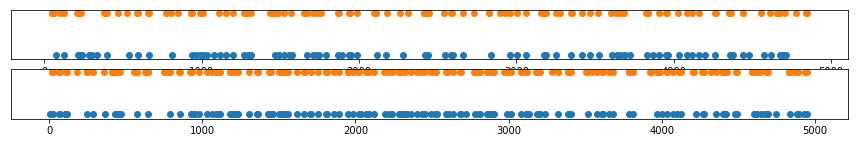

In [15]:
d=-1

fig, ax = plt.subplots(nrows=2, figsize=(15,2))

ax[0].set_yticks(np.arange(0, 1, step=1))
ax[0].scatter(out_spikes[0][:d], np.ones_like(out_spikes[0][:d]));
ax[0].scatter(spikes[0][:d], np.ones_like(spikes[0][:d])*2);

ax[1].set_yticks(np.arange(0, 1, step=1))
ax[1].scatter(out_spikes[1][:d], np.ones_like(out_spikes[1][:d]));
ax[1].scatter(spikes[1][:d], np.ones_like(spikes[1][:d])*2);

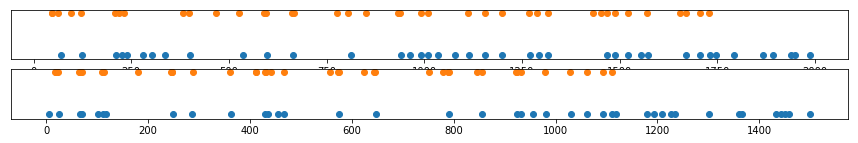

In [22]:
d=40

fig, ax = plt.subplots(nrows=2, figsize=(15,2))

ax[0].set_yticks(np.arange(0, 1, step=1))
ax[0].scatter(out_spikes[0][:d], np.ones_like(out_spikes[0][:d]));
ax[0].scatter(spikes[0][:d], np.ones_like(spikes[0][:d])*2);

ax[1].set_yticks(np.arange(0, 1, step=1))
ax[1].scatter(out_spikes[1][:d], np.ones_like(out_spikes[1][:d]));
ax[1].scatter(spikes[1][:d], np.ones_like(spikes[1][:d])*2);

In [16]:
fits = fitter.generate(params=None, output_var='v',)

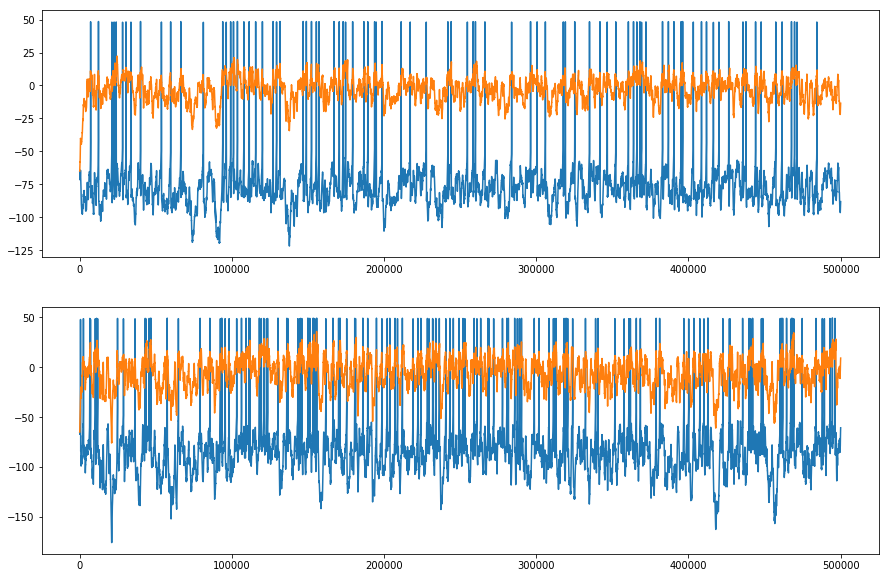

In [17]:
fig, ax = plt.subplots(nrows=2, figsize=(15,10))

ax[0].plot(voltage1);
ax[0].plot(fits[0]/mV)

ax[1].plot(voltage2);
ax[1].plot(fits[1]/mV);
